---
---
---
# CSC8111 Mini-projects
## Introduction

This document defines three project-style questions which go more deeply into different aspects of the module's content. You have to answer **ALL** of these project-stye questions.

The learning objectives of this assignment are:
1. To learn about the design of machine learning analysis pipelines
2. To understand how to select appropriate methods given the dataset type
3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
4. To critically evaluate the performance of the designed machine learning pipelines
5. To learn and practice the skills of reporting machine learning experiments

For this coursework you will be provided with three different datasets each of a different nature:
1. A tabular dataset (defined as a classification problem)
2. A tabular dataset (defined as a regression problem)
3. A text dataset

Your job is easy to state: You should design a range of machine learning pipelines appropriate to the nature of each dataset. Overall, we expect that you will perform a thorough investigation involving (whenever relevant) all parts of a machine learning pipeline (exploration, preprocessing, model training, model interpretation and evaluation), evaluating a range of options for all parts of the pipeline and with proper hyperparameter tuning.

You will have to write a short report (as part of this notebook) that presents the experiments you did, their justification, a detailed description of the performance of your designed pipelines using the most appropriate presentation tools (e.g., tables of results, plots). We expect that you should be able to present your work at a level of detail that would enable a fellow student to reproduce your steps.

## Deliverables
An inline report and code blocks addressing the marking scheme below. The report is expected to have 1000 to 2000 words. The word count excludes references, tables, figures, code blocks and section headers, and has a 10% leeway.

## Marking scheme

- Dataset exploration: 10 marks
- Methods: 30 marks
- Results of analysis: 30 marks
- Discussion: 20 marks
- Presentation (Writing Style, references, figures, etc.): 10 marks

This marking scheme will be applied separately to each mini-project. The overall mark will give 40% weight to mini-projects 1 and 2 (classification and regression) and 20% weight to mini-project 3 (NLP).

Some help for good marks:
- Split your work up into separate code blocks to help the reader understand what you have done.
- Provide text blocks, between code blocks, which help expalin what your code blocks are doing.
- It's not just about applying the first pipeline you find and using default hyperparameters but trying different pipelines and optimising the hyperparameters.
- We expect the solutions that you use to be based on the machine learning techniques you have been taught in the lectures/practicals.
- Note there are marks for presentation, so think about this both for the code, outputs and text you write.

---
---
## Dataset 1: Classification

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label (target variable) is about the severity of the accident. It has 20 features and over 100K examples. The dataset is available in Canvas as a CSV file, in which the last column contains the class labels: https://ncl.instructure.com/courses/59112/modules/items/3547579

## What you need to do:

You will need to perform the following steps on the dataset:
1. EDA
2. Data normalisation
3. Split the data into training and test sets using cross-validation
4. Develop **two** machine learning pipelines for classifying the severity of the accident
5. Present the results for your pipeline using the most appropriate set of metrics.
6. Provide a short report on which approaches you used and which gave the best results. It would be good to consider why particular pipelines gave the best results.

Some help for good marks:
- We expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data normalisation, feature/instance selection, class imbalance correction, several (appropriate) machine learning pipelines and hyperparameter tuning.


## Your answer below

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   CASE_STATE                           100968 non-null  object
 1   AGE                                  100968 non-null  int64 
 2   SEX                                  100968 non-null  object
 3   PERSON_TYPE                          100968 non-null  object
 4   SEATING_POSITION                     100968 non-null  object
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  object
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  object
 7   EJECTION                             100968 non-null  object
 8   EJECTION_PATH                        100968 non-null  object
 9   EXTRICATION                          100968 non-null  object
 10  NON_MOTORIST_LOCATION                100968 non-null  object
 11  POLICE_REPORTED_ALCOHOL_IN

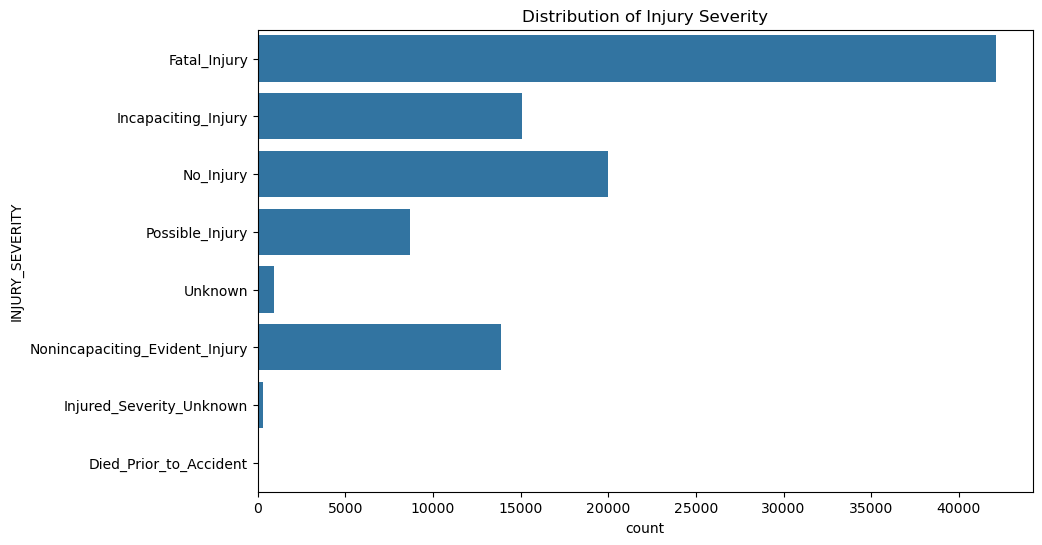

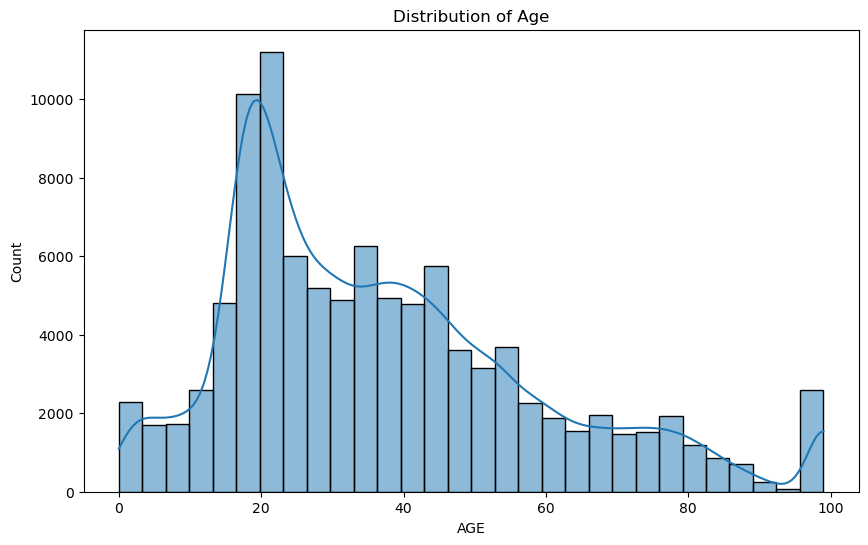

ValueError: could not convert string to float: 'Alabama'

<Figure size 1500x1000 with 0 Axes>

In [4]:
data = pd.read_csv('fars.csv')
# Display basic information about the dataset
print(data.info())

# Display summary statistics
print(data.describe(include='all'))

# Check for missing values
print(data.isnull().sum())

# Plot the distribution of the target variable 'INJURY_SEVERITY'
plt.figure(figsize=(10, 6))
sns.countplot(data['INJURY_SEVERITY'])
plt.title('Distribution of Injury Severity')
plt.show()

# Plot the distribution of 'AGE'
plt.figure(figsize=(10, 6))
sns.histplot(data['AGE'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print(data.head())

---
---
## Dataset 2: Regression

In this part of the coursework you are going to look at a regession problem - predicting the growth rate of a bacteria. The provided dataset contains results from a set of experiments where we grew bacteria of different strains and under different conditions (CO2 availability, light, etc..) to compute a growth curve for the bacteria - represented by the variables 'a' and 'mu'. Your job is to predict the results of the experiment - 'a' and 'mu' (these are the growth-rate parameters for the bacteria, but you don't need to understand the details to do the coursework).

The dataset is available from https://ncl.instructure.com/courses/59112/modules/items/3547584

The CSV contains 7 fields as follows:

| variable | description |
|-----|------|
| n_cyanos | The number of Cyanobacteria available at the start |
| co2 | The amount of CO2 available |
| light | The amount of light available |
| SucRatio | How good the bacteria is at producing sucrose |
| Nsample | Experiment number |
| a | Maximum number of bacteria seen (Target variable) |
| mu | Growth rate of bacteria (Target variable) |


## What you need to do:

You will need to perform the following steps on the dataset:
1. EDA
2. Data normalisation
3. Split the data into train/test/validate
4. Develop **two** machine learning pipelines for predicting 'a' and 'mu'. This should include hyperparameter tuning. Note: This is not two pipelines one for 'a' one for 'mu'... but two pipelines for 'a', two for 'mu'...
5. Present the results for your models using the most appropriate set of metrics.
6. Provide a short report on which approaches you used and which gave the best results. It would be good to consider why particular models gave the best results.

Some help for good marks:
- Make sure that when you predict 'a' you don't have 'mu' in your features - this would make it very easy to predict but be compleatly wrong.
- Remember that this is a **regression** problem and use pipelines that are appropriate for this.
- Hyperparameters can be crucial to get good results here.

## Your answer below

---
---
## Dataset 3: NLP

In this part of the coursework you will be looking at a dataset containing text from news articles. These are stored in a CSV file, however, as the news articles use commas you will need to use a tab as the separator when reading in the file.

The file contains just one feature - the news story, one per line.

The dataset can be downloaded from: https://ncl.instructure.com/courses/59112/modules/items/3547585

## What you need to do:

You will need to perform the following steps on the dataset:
1. EDA
2. Build a pipline which can transform the text into a format which can be handled by a machine learning model
3. Work out how many types of news articles are present in the dataset
4. Present the results for your work in the most appropriate means.
5. Provide a short report on which approaches you used and which gave the best results.

Some help for good marks:
- This part of the coursework is all about how to convert the data into a format that you can feed into a machine learning model. It is not about using the machine learning models. Focus on how you can make your conversion as good as possible.
- We are not expecting a particular number for 'how many types of news articles are present'. This is more about you presenting the data and trying to justify a number.
- Hyperparameter tuning is essential for this.

## Your answer below